<div align="center">
  <img src="https://www.dropbox.com/s/vold2f3fm57qp7g/ECE4179_5179_6179_banner.png?dl=1" alt="ECE4179/5179/6179 Banner" style="max-width: 60%;"/>
</div>

<div align="center">


# A Journey Through Optimization

</div>

Welcome to **ECE4179/5179/6179 Week 4**! This week, we will focus on the Gradient Descent (GD) algorithm. GD is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The method of GD can be dated back to the work of the French mathematician Augustin-Louis Cauchy in 19th century (Compte Rendu `a l’Acad´emie des Sciences, 1847). As you can guess, adaptation of GD into machine learning and artificial intelligence has been influential. Despite its sheer simplicity, GD has paved the way to what some may call "the silicon intelligence" today. As humans, we are "carbon-based life forms", hence "carbon-intelligence" might describe our intelligence. Some argue that silicon-intelligence is superior to carbon-intelligence. Compare the number of synapses (parameters), silicon-intelligence has vs. several mammals below to see why.   


<div align="center">
  <img src="data/compare_GPT4_mammal_brain.jpeg" alt="Synapsis comparison" style="max-width: 60%;"/>

  [Source](https://twitter.com/hodlipson/status/1608887008436555777?s=20)
</div>



With this short introduction, roll up your sleeves and let's get started!

In [27]:
# as always, we start by importing the necessary packages

# Enable autoreload extension
%load_ext autoreload
%autoreload 2

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


# Set random seed
RND_SEED = 4179
np.random.seed(RND_SEED)

from ECE4179_utils_ws4 import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Gradient Descent (GD)**

---

Gradient Descent is a first-order iterative optimization algorithm used to find the minimum of a function. Considering minimizing a differentiable function 


\begin{equation} 
    f(\mathbf{x}): \mathbb{R}^n \rightarrow \mathbb{R} 
\end{equation}

The gradient descent method updates the variable $\mathbf{x}$ iteratively using the following update rule:

\begin{equation} 
    \mathbf{x}_{\text{new}} = \mathbf{x}_{\text{old}} - \eta \nabla f(\mathbf{x}_{\text{old}}) 
\end{equation}

Here:
- $\mathbf{x}_{\text{old}}$ and $\mathbf{x}_{\text{new}}$ are the old and new values of the variable $\mathbf{x}$, respectively.

- $\eta$ is the learning rate, a hyperparameter that determines the step size in the direction of the steepest descent.

- $\nabla f(\mathbf{x}_{\text{old}})$ is the gradient of the function $f(\mathbf{x})$ at $\mathbf{x}_{\text{old}}$, pointing in the direction of the steepest ascent.

The algorithm starts with an initial guess for $\mathbf{x}$ and iteratively moves in the direction opposite to the gradient until it reaches a local minimum. Let's see how this works in practice. 


<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">



### <span style="color: pink;">Task #1.</span>  GD basics
Your task is to compute the gradient of the following function. Remember for univariate functions, the gradient is the derivative. 

\begin{equation} 
    f(x) = x^2 + \cos(x) + 2
\end{equation}
</div>

<details>
<summary style="color: yellow; font-weight: bold;">Show Answer</summary>

\begin{equation} 
    \nabla f(x) = 2x - \sin(x)
\end{equation}

</details>




Now, that was quite easy. However, what does this mean exactly? For example, the gradient of $f$ at $x=1$ is 
$2-\sin(1) \approx 1.59$. What does this geometrically mean? Let's visualize it.

In [28]:
def f1(x):
    return  x**2 + np.cos(x) + 2

def df1_dx(x):
    return 2*x - np.sin(x)




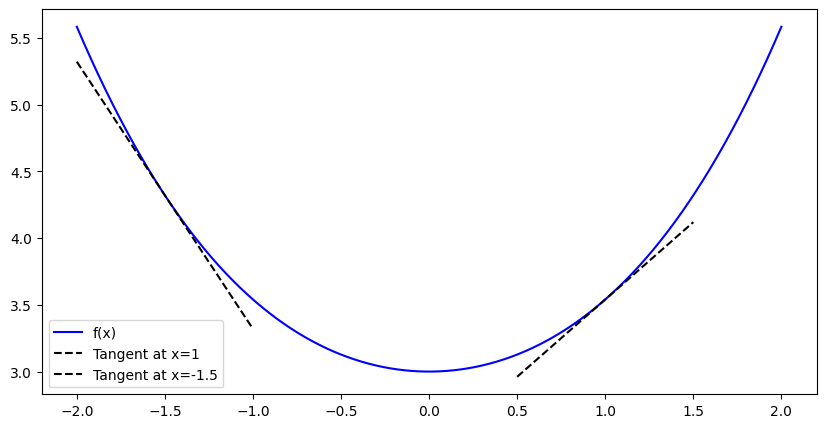

In [29]:
# let's plot the function and its gradient at two points
# x=-1.5 and x=1


x = np.linspace(-2, 2, 100)  # Define the x-values for the plot

x_points = [1, -1.5]  # Define the points where the tangents will be plotted

plt.figure(figsize=(10, 5))
plt.plot(x, f1(x), c='b', label='f(x)')  # Plot the function
# Plot the tangents at the specified points
for x0 in x_points:
    plot_tangent(f1, df1_dx, x0)
plt.legend()  # Display the legend
plt.show()  # Show the plot





**Gradient in Univariate Functions**

For univariate functions, the gradient (our old good friend, aka, the derivative) is a 
scalar value that represents the slope of the tangent line to the graph of the function at a specific point. 

However, that is not the only information that the gradient provides. 
The gradient also tells us the direction in which the function increases the most. For example, in our case above,
the gradient at $x=-1.5$ is approximately -4. This means that if you want to increase the value of the function,
you should go to the left (why). If you want to decrease the value of the function, then you should go in the opposite direction of the gradient, in our case to the right. 


<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Task #2.</span>  Gradient and univariate functions

Now, think about $x=1$ and the gradient at that point. What is the direction that you should go to increase the value of the function? What is the direction that you should go to decrease the value of the function?
</div>

<details>
<summary style="color: yellow; font-weight: bold;">Show Answer</summary>

The gradient at $x=1$ is approximately 1.59. This means that if you want to increase the value of the function, you should go to the right. If you want to decrease the value of the function, then you should go to the left.

</details>



**Implementing the Gradient Descent Algorithm**

You can implement a vanilla GD using a for loop. Let's review the main steps of the algorithm:

1. **Initialization**: Choose an initial guess for $\mathbf{x}$, set hyperparameters of the algorithm 
(the learning rate $\eta$ and maximum number of iterations of the algorithm (`maxiter`).

2. **Iteration**: For each iteration up to `maxiter`, do the following:
   a. **Compute the Gradient**: Calculate the gradient of the function $f(\mathbf{x})$ at the current $\mathbf{x}$, denoted as $\nabla f(\mathbf{x})$.

   b. **Update the Variable**: Update $\mathbf{x}$ using the update rule:
   
    \begin{equation}
        \mathbf{x}_{\text{new}} = \mathbf{x}_{\text{old}} - \eta \nabla f(\mathbf{x}_{\text{old}})
    \end{equation}


We do not bother ourselves with the convergence criteria in our code but if you simply opt for a more elaborate implementation, you can add a convergence criterion to your code. For example, you can check if the difference between the current and previous values of $\mathbf{x}$ is less than a threshold value, say $10^{-6}$, and if so, stop.

Study the code snippet below and get ready to see the GD in action!



In [30]:
def GD(func, grad, x0, eta=1e-3, maxiter=100):
    ''' 
    Gradient descent algorithm
    func: objective function
    grad: gradient of the objective function
    x0: initial point
    eta: step size (aka learning rate)
    maxiter: maximum number of iterations

    return: x, the solution after maxiter iterations
            and a dictionary containing the history of the algorithm
            hist_f: the history of the objective function values
            hist_x: the history of the solution x
            hist_g: the history of the gradient at the solution x
    '''
    hist_f = []
    hist_x = []
    hist_g = []
    x = x0
    for i in range(maxiter):
        # keep track of the history
        hist_f.append(func(x))
        hist_x.append(x)
        hist_g.append(grad(x))

        # update x according to x <- x - eta * grad(x)
        x = x - eta * grad(x)

    hist_dict = {'hist_f': hist_f, 'hist_x': hist_x, 'hist_g': hist_g}
    return x, hist_dict
   

### The Six-hump Camelback function

A modified version of the six-hump camelback function can be defined as:
\begin{align}
    f(x) = 4x^2 - 2.1x^4 + \frac{1}{3}x^6 + x\cos(x)
\end{align}


<div align="center">
  <img src="https://www.nicepng.com/png/detail/245-2450208_camels-clipart-2-hump-cartoon-camel-two-humps.png" alt="cute camel" style="max-width: 40%;"/>
</div>


<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Task #3.</span>  Implement the six-hump camelback function and its gradient

Implement the six-hump camelback function and its gradient below so we can study the GD algorithm on this function.



</div>

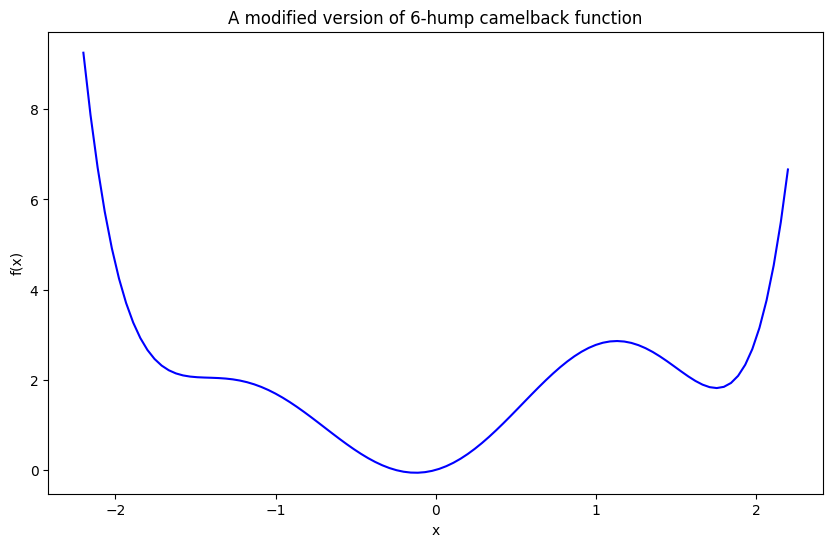

In [31]:
def uni_6_hump_camelback(x):
    f_x = (4 - 2.1*(x**2) + (x**4)/3)*(x**2) + x*np.cos(x)
    return f_x

def grad_uni_6_hump_camelback(x):
    df_dx = 8*x - 8.4*(x**3) + 2*(x**5) + np.cos(x) - x*np.sin(x)
    return df_dx


# plotting the function

x = np.linspace(-2.2, 2.2, 100)
y = uni_6_hump_camelback(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('A modified version of 6-hump camelback function')
plt.show()


<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Task #4.</span>  Apply GD

Imagine you are at $x=-2$. Apply GD function to the camelback function with $\eta=0.05$ for five iterations. What is the value of the function at the end of the 15 iterations? Have you arrived at the minimum? If not, what should you do to arrive at the minimum?



**Hint:** You can use the helper function plot_history to plot the path that you take. This function takes the history of the GD function as an input and plots the path that you take. Here is an example of how you can use this function.

```python
    x_star1, gd_hist1 = GD(uni_6_hump_camelback, grad_uni_6_hump_camelback, x0, lr, max_iter)
    plot_history(x,uni_6_hump_camelback, x_star1,gd_hist1)
```

<details>
<summary style="color: yellow; font-weight: bold;">Show Answer</summary>

```python
    x0 = -2
    lr = 0.05
    max_iter = 5 
    x_star1, gd_hist1 = GD(uni_6_hump_camelback, grad_uni_6_hump_camelback, x0, lr, max_iter)

    print(f'x* = {x_star1}, f(x*) = {uni_6_hump_camelback(x_star1)}')
    plot_history(x,uni_6_hump_camelback, x_star1,gd_hist1)
```

</details>

x* =  1.75, f(x*) =  1.82


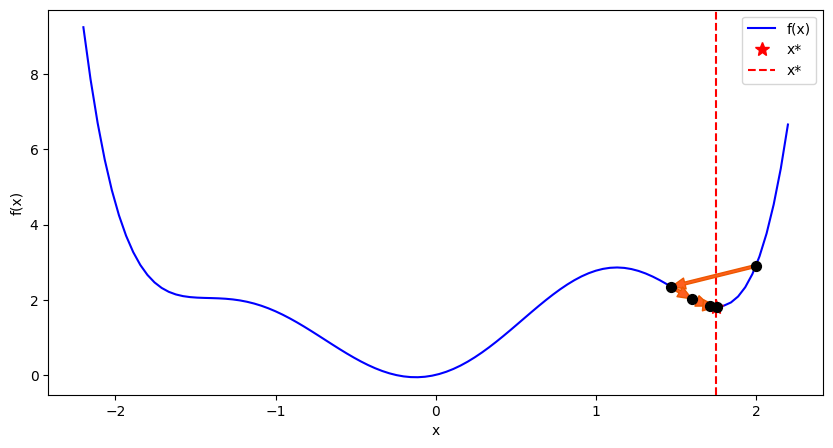

In [32]:
x0 = 2
lr = 0.05
max_iter = 5 
x_star1, gd_hist1 = GD(uni_6_hump_camelback, grad_uni_6_hump_camelback, x0, lr, max_iter)
print(f'x* = {x_star1: .2f}, f(x*) = {uni_6_hump_camelback(x_star1): .2f}')
plot_history(x,uni_6_hump_camelback, x_star1,gd_hist1)

### From 1D to 2D

The Ackley's function is a well-known multimodal function that is often used to test optimization algorithms. It is defined as follows:
\begin{equation}
    f(x,y) = -20 \exp \left( -0.2 \sqrt{0.5(x^2 + y^2)} \right) - \exp \left( 0.5 \left( \cos(2\pi x) + \cos(2\pi y) \right) \right) + e + 20
\end{equation}




<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">



### <span style="color: pink;">Task #5.</span>  Obtain the gradient of the Ackley's function
Your task is to compute the gradient of the Ackley's function. Remember, the gradient is a vector of partial derivatives. 
That is $\nabla f = \left[ \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right]$.
</div>

<details>
<summary style="color: yellow; font-weight: bold;">Show Answer</summary>
There are a couple of things to recall if it is a long time that you didn't work with derivatives. 
First, the derivative of a sum is the sum of the derivatives. That is, 

\begin{align} (f + g)' = f' + g'\;. \end{align} 

Also, the derivative of a product is 
 
\begin{align} (fg)' = f'g + fg'\;. \end{align}
 
The derivative of $\exp(f(x))$ is 
  
\begin{align} \exp(f(x))' =  f'(x)\exp(f(x))\;. \end{align}
  
The derivative of $\sqrt{f(x)}$ is 


\begin{align} \sqrt{f(x)}' = \frac{f'(x)}{2\sqrt{f(x)}}\;. \end{align}

You most definitely need to know a golden rule, the chain rule. The chain rule states that the derivative of 
$f(g(x))$ is $f'(g(x))g'(x)$.

Using all the above and going through a somewhat painful exercise, you should be able to obtain the following gradients:

\begin{align}
\frac{\partial f}{\partial x} &= \frac{2\sqrt{2}x}{\sqrt{x^2 + y^2}} \exp \left( -0.2 \sqrt{0.5(x^2 + y^2)} \right) + \pi \sin(2\pi x) \exp \left( 0.5 \left( \cos(2\pi x) + \cos(2\pi y) \right) \right)\;.\\
\frac{\partial f}{\partial y} &= \frac{2\sqrt{2}y}{\sqrt{x^2 + y^2}} \exp \left( -0.2 \sqrt{0.5(x^2 + y^2)} \right) + \pi \sin(2\pi y) \exp \left( 0.5 \left( \cos(2\pi x) + \cos(2\pi y) \right) \right)\;.
%
\end{align}

</details>

But worry none, we have computational in the title of our workshop so let's just implement the Ackley function and its derivative and see how GD may work there. Study the code below and try to understand what is going on. 

In [33]:
def ackley_func(v):
    """
    The Ackley function, a commonly used benchmark function in optimization.
    
    :param v: A two-dimensional array where each row represents a point (x, y) in the input space.
    :return: The value of the Ackley function at each point in v.
    """
    pi = np.pi
    x = v[:,0]  # Extract the x coordinates
    y = v[:,1]  # Extract the y coordinates
    x_sq = x**2
    y_sq = y**2

    # Calculate the exponential term
    exp_term = np.exp(-0.2 * np.sqrt(0.5 * (x_sq + y_sq)))
    # Calculate the cosine term
    cos_term = np.cos(2*pi*x) + np.cos(2*pi*y)

    # Compute the Ackley function value
    f_xy = -20 * exp_term - np.exp(0.5 * cos_term) + np.e + 20
    return f_xy 



def ackley_grad(v):
    """
    gradient of the Ackley function.
    
    :param v: A two-dimensional array where each row represents a point (x, y) in the input space.
    :return: A two-dimensional array where each row represents the gradient at the corresponding point in v.
    """
    pi = np.pi
    x = v[:, 0]  # Extract the x coordinates
    y = v[:, 1]  # Extract the y coordinates

    x_sq = x**2
    y_sq = y**2

    # Calculate the exponential term and its derivative
    sqrt_term = np.sqrt(x_sq + y_sq)
    exp_term = np.exp(-0.1 * np.sqrt(2) * sqrt_term)
    d_exp_dx = (2 * np.sqrt(2) * x / sqrt_term) * exp_term
    d_exp_dy = (2 * np.sqrt(2) * y / sqrt_term) * exp_term
    
    # Calculate the cosine term and its derivative
    cos_term = np.cos(2 * pi * x) + np.cos(2 * pi * y)
    exp_cos_term = np.exp(0.5 * cos_term)
    d_cos_dx = pi * np.sin(2 * pi * x) * exp_cos_term
    d_cos_dy = pi * np.sin(2 * pi * y) * exp_cos_term
    
    # Compute the gradient
    df_dx = (d_exp_dx + d_cos_dx)
    df_dy = (d_exp_dy + d_cos_dy)

    # Combine the partial derivatives into a gradient array
    grad = np.array([df_dx, df_dy]).T
    return grad




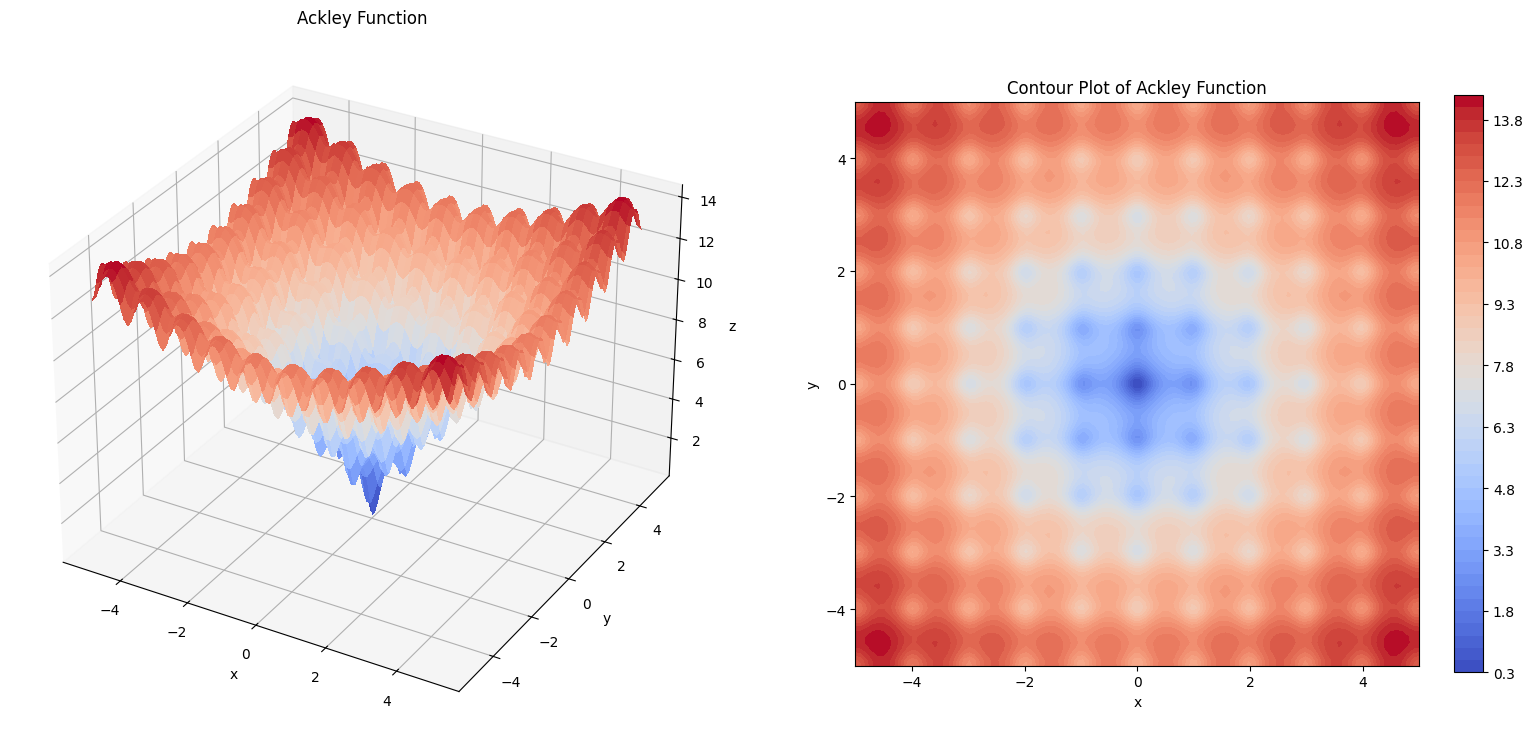

In [34]:
# Grid setup
num_pnts = 100
x = np.linspace(-5, 5, num_pnts)
y = np.linspace(-5, 5, num_pnts)
X_grid, Y_grid = np.meshgrid(x, y)

v = np.array([X_grid, Y_grid]).reshape(2, -1).T
Z = ackley_func(v).reshape(num_pnts, num_pnts)

# Figure setup
fig = plt.figure(figsize=(20, 10))

# Subplot 1: 3D surface plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X_grid, Y_grid, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Ackley Function')

# Subplot 2: Contour plot
ax2 = fig.add_subplot(1, 2, 2)
contour_plot = ax2.contourf(X_grid, Y_grid, Z, levels=50, cmap=cm.coolwarm)
plt.colorbar(contour_plot, ax=ax2, shrink=0.75)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot of Ackley Function')
ax2.set_aspect('equal')  # Make the contour plot square

plt.show()


As you have noticed, the Ackley function has many local minima. This makes it a good test function for optimization algorithms. Let's have some fun. Start from point $x_0 = (4, 3)$ and use gradient descent to find the minimum of the Ackley function. Pick learning rate yourself and run the algorithm for 15 iterations. 



In [35]:
x_start, y_start = 4, 3

# Learning rate
lr = 0.15

# Number of iterations
max_iter = 15

x0 = np.array([[x_start, y_start]])
x_ast, hist_ackley = GD(ackley_func, ackley_grad, x0, lr, max_iter)

Run the cell below to understand what has happened inside GD! 

In [36]:
def update_graph(i, ax):
    if i > 0:
        ax.annotate('', xy=(x_history[i], y_history[i]), xytext=(x_history[i - 1], y_history[i - 1]),
                    arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=2))
    ax.set_title('Gradient Descent on Ackley Function, iteration={}'.format(i))

# Extract x and y history from hist_ackley
hist_x = hist_ackley['hist_x']
x_history = [coord[0][0] for coord in hist_x]
y_history = [coord[0][1] for coord in hist_x]


# plot the initial state
fig, ax = plt.subplots(figsize=(6, 6))
contour_plot = ax.contourf(X_grid, Y_grid, Z, levels=50, cmap=cm.coolwarm)

ax.set_aspect('equal')  # Make the contour plot square
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient Descent on Ackley Function')

# animate the graph
ani = FuncAnimation(fig, update_graph, frames=len(x_history), fargs=(ax,), interval=300, blit=False)
plt.colorbar(contour_plot, ax=ax, shrink=0.75)
plt.close()
HTML(ani.to_jshtml())

<div style="background-color: #0855cf; color: white; padding: 10px; border-radius: 5px;">



### <span style="color: yellow;">Conclusions</span>  

In this notebook, we studied the fundamentals of the GD algorithm. We explored the mathematical foundation of the gradient and its geometric interpretation, focusing on both univariate and multivariate functions. Have it at the back of your mind, silicon-intelligence emerges from the mathematical foundations of the GD we use!





<div align="center">
<img src="data/tintin_meme.jpg" alt="Breast Cancer dataset" style="width: 60%;">
</div>

<br><br>

### In Differentiable Programming We Trust!

Computing the gradient of a function manually can be cumbersome, especially for complex functions. This is where automatic differentiation comes into play. It allows us to compute gradients automatically, simplifying the process and reducing the likelihood of errors. Libraries like PyTorch and TensorFlow use automatic differentiation to compute gradients for training neural networks.

Let’s take a quick look at how PyTorch can make our lives easier. 

In PyTorch, all you need to do is:
1. Define your function.
2. Identify the variables for which you want to compute the gradient.
3. Call the `backward()` function.

Let's see how this works in practice.


In [37]:
import torch 

# Define the 6-hump camelback function using PyTorch
def uni_6_hump_camelback_torch(x):
    return (4 - 2.1*(x**2) + (x**4)/3)*(x**2) + x*torch.cos(x)


# Define a function to calculate the derivative using autograd
def grad_uni_6_hump_camelback_autograd(x):
    x_torch = torch.tensor(x, requires_grad=True)
    f_x = uni_6_hump_camelback_torch(x_torch)
    f_x.backward()
    return x_torch.grad.item()

# Example usage
x = 3.0
exact_grad = grad_uni_6_hump_camelback(x)
autograd_grad = grad_uni_6_hump_camelback_autograd(x)

print(f"   Exact derivative at x={x:6.3f}: {exact_grad:6.3f}")
print(f"Autograd derivative at x={x:6.3f}: {autograd_grad:6.3f}")


   Exact derivative at x= 3.000: 281.787
Autograd derivative at x= 3.000: 281.787


And here is the code to compute the gradient of the Ackley function using PyTorch. Compare the results with the ones you obtained above. 




In [38]:
# Define the Ackley function using PyTorch
def ackley_func_torch(v):
    pi = torch.pi
    x = v[:, 0]  # Extract the x coordinates
    y = v[:, 1]  # Extract the y coordinates
    x_sq = x**2
    y_sq = y**2

    # Calculate the exponential term
    exp_term = torch.exp(-0.2 * torch.sqrt(0.5 * (x_sq + y_sq)))
    # Calculate the cosine term
    cos_term = torch.cos(2 * pi * x) + torch.cos(2 * pi * y)

    # Compute the Ackley function value
    f_xy = -20 * exp_term - torch.exp(0.5 * cos_term) + torch.exp(torch.tensor(1.0)) + 20
    return f_xy

# Define a function to calculate the gradient using autograd
def grad_ackley_func_autograd(v):
    v_torch = torch.tensor(v, requires_grad=True)
    f_xy = ackley_func_torch(v_torch)

    # Ensure the gradient is zeroed out before the backward pass
    # if v_torch.grad is not None:
    #     v_torch.grad.zero_()

    f_xy.backward()
    return v_torch.grad.numpy()

# Example usage
v = np.array([[1.3, 0.5]])
exact_grad = ackley_grad(v)
autograd_grad = grad_ackley_func_autograd(v)

print(f"   Exact gradient: at ({v[0][0]:6.3f}, {v[0][1]:6.3f}) = ({exact_grad[0][0]:6.3f}, {exact_grad[0][1]:6.3f})")
print(f"Autograd gradient: at ({v[0][0]:6.3f}, {v[0][1]:6.3f}) = ({autograd_grad[0][0]:6.3f}, {autograd_grad[0][1]:6.3f})") 
      
      



   Exact gradient: at ( 1.300,  0.500) = ( 3.721,  0.834)
Autograd gradient: at ( 1.300,  0.500) = ( 3.721,  0.834)
